# Font-type Recognition with RNNs using Keras

In [1]:
import keras

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

      
print('Keras version: ',keras.__version__)

Keras version:  2.4.3


## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [2]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

In [3]:
# To see what is in the file: inspect data (arr_0 are images, arr_1 labels)

for k in data.files:
  print(k)

print(type(data['arr_0']))
print(type(data['arr_1']))


arr_0
arr_1
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [5]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [6]:
train.shape

(2511, 36, 36)

In [7]:
'''# Only for basic neural network
train=train.reshape([-1,train.shape[1]*train.shape[2]])
test=test.reshape([-1,test.shape[1]*test.shape[2]])

print('Train shape=', train.shape , '\nTest shape=', test.shape)
'''

"# Only for basic neural network\ntrain=train.reshape([-1,train.shape[1]*train.shape[2]])\ntest=test.reshape([-1,test.shape[1]*test.shape[2]])\n\nprint('Train shape=', train.shape , '\nTest shape=', test.shape)\n"

In [8]:
'''
train=train.reshape(train.shape[0],train.shape[1], 1)
test=test.reshape(test.shape[0],test.shape[1], 1)
print('Train shape=', train.shape , '\nTest shape=', test.shape)
'''

"\ntrain=train.reshape(train.shape[0],train.shape[1], 1)\ntest=test.reshape(test.shape[0],test.shape[1], 1)\nprint('Train shape=', train.shape , '\nTest shape=', test.shape)\n"

In [9]:
# For CNNs
'''
train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

#vgg
num_classes = onehot_test.shape[1]

print('Train shape=', train.shape , '\nTest shape=', test.shape, '\nNum clasess =', num_classes)
'''

"\ntrain=train.reshape([-1,train.shape[1],train.shape[2],1])\ntest=test.reshape([-1,test.shape[1],test.shape[2],1])\n\n#vgg\nnum_classes = onehot_test.shape[1]\n\nprint('Train shape=', train.shape , '\nTest shape=', test.shape, '\nNum clasess =', num_classes)\n"

## 1.   **Define your ConNet model**:

In [10]:
from keras.models import Sequential

from keras.layers import Dropout, Dense, Flatten, Input, LSTM, SimpleRNN


In [12]:
# Definition of the input shape and number of classess
nb_classes = onehot_test.shape[1]
img_rows, img_cols = train.shape[1], train.shape[2]
#train shape = 36x36


#### Simple RNN- 1 layer

In [13]:

# define the RNN model
model = Sequential()
model.add(SimpleRNN(50,input_shape=(img_rows, img_cols)))
model.add(Dense(nb_classes, activation='softmax'))



#model.add(LSTM(256, input_shape=(100, train.shape[2])))


#### RNN- 3 layers

In [14]:
'''
model = Sequential()

model.add(SimpleRNN(32,input_shape=(img_rows, img_cols), return_sequences=True))
model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(8))
model.add(Dense(nb_classes, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(SimpleRNN(32,input_shape=(img_rows, img_cols), return_sequences=True))\nmodel.add(SimpleRNN(16, return_sequences=True))\nmodel.add(SimpleRNN(8))\nmodel.add(Dense(nb_classes, activation='softmax'))\n"

#### LSTM 

In [15]:

model = Sequential()
model.add(LSTM(32, input_shape=(img_rows, img_cols), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(onehot_test.shape[1], activation='softmax'))


## 2.   **Compile your model**. Specify loss functions and optimizers

In [16]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [17]:
model.summary() #dense layer la que mas param tiene entrenados


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 32)            8832      
_________________________________________________________________
lstm_1 (LSTM)                (None, 36, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 36, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 33,957
Trainable params: 33,957
Non-trainable params: 0
__________________________________________________

# 3.   **Fit your model**. Train the model using data.

In [18]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(train, onehot_train,
         epochs=50,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Epoch 1/50
20/20 [==============================] - 8s 89ms/step - loss: 1.5831 - accuracy: 0.2337 - val_loss: 1.4605 - val_accuracy: 0.3297
Epoch 2/50
20/20 [==============================] - 0s 15ms/step - loss: 1.3042 - accuracy: 0.4503 - val_loss: 1.0412 - val_accuracy: 0.4839
Epoch 3/50
20/20 [==============================] - 0s 15ms/step - loss: 0.9346 - accuracy: 0.5757 - val_loss: 0.8444 - val_accuracy: 0.6093
Epoch 4/50
20/20 [==============================] - 0s 15ms/step - loss: 0.7918 - accuracy: 0.6373 - val_loss: 0.7204 - val_accuracy: 0.7204
Epoch 5/50
20/20 [==============================] - 0s 15ms/step - loss: 0.6866 - accuracy: 0.7002 - val_loss: 0.5986 - val_accuracy: 0.7455
Epoch 6/50
20/20 [==============================] - 0s 16ms/step - loss: 0.5618 - accuracy: 0.7595 - val_loss: 0.5575 - val_accuracy: 0.7706
Epoch 7/50
20/20 [==============================] - 0s 15ms/step - loss: 0.5078 - accuracy: 0.7832 - val_loss: 0.4923 - val_accuracy: 0.7885
Epoch 8/50
20

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [26]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

20/20 [==============================] - 0s 7ms/step - loss: 0.0681 - accuracy: 0.9713

Training Accuracy= 0.9713261723518372
3/3 [==============================] - 0s 8ms/step - loss: 0.0625 - accuracy: 0.9785

Test Accuracy= 0.9784946441650391


Train Accuracy:  0.98
Test Accuracy:  0.98


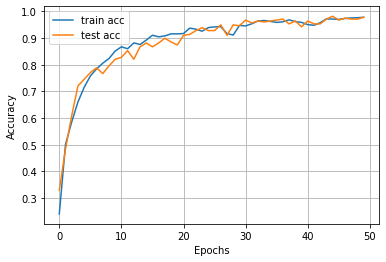

In [27]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc', 'test acc'])
plt.grid()


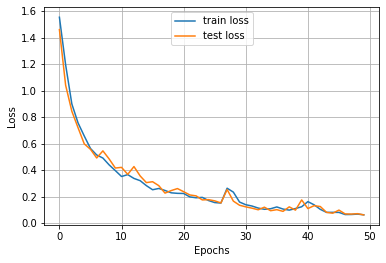

In [28]:
# Plot the loss curves

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train loss', 'test loss'], loc='upper center')
plt.grid()

Train Accuracy:  0.98
Test Accuracy:  0.98


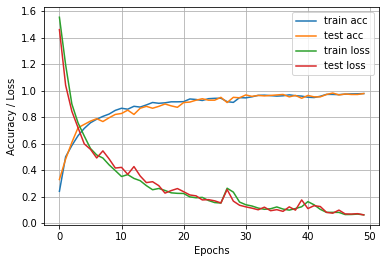

In [29]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend(['train acc', 'test acc','train loss', 'test loss'])
plt.grid()

# Get predictions / probabilities ...

In [24]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[4.8857339e-05 1.3065853e-03 8.8619097e-05 3.8504717e-04 9.9817085e-01]
 [6.6239045e-05 9.9851674e-01 7.0254051e-04 9.1626069e-05 6.2286470e-04]
 [6.1658495e-05 1.2367327e-03 9.3670467e-05 5.2710826e-04 9.9808085e-01]
 [4.8654866e-03 9.6377428e-04 9.9408346e-01 2.2475357e-05 6.4847940e-05]
 [8.5544038e-05 2.2178050e-04 1.2806058e-04 9.9933147e-01 2.3309900e-04]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[58  0  3  0  0]
 [ 0 69  2  0  0]
 [ 0  0 48  0  0]
 [ 0  0  0 43  0]
 [ 0  1  0  0 55]]


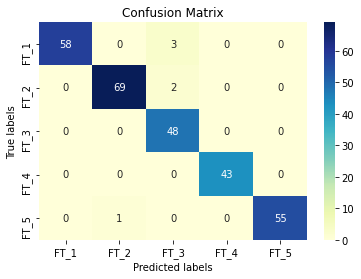

In [25]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);